## Monte Carlo simulation

Developed by **NICHOLAS DOMINIC** (nicholas.dominic@binus.ac.id)

In [1]:
from numpy import array, mean, std
from scipy import stats
from seaborn import distplot
from warnings import filterwarnings as fw
from matplotlib.pyplot import figure, savefig
fw("ignore")

Certain variables:
* Interest rate per month
* Corporate first-year budget

Uncertain variables:
* Labor cost
* Additional cost
* First-year customer demand

In [2]:
class ProbabilityDistribution:
    def __init__(self):
        pass
                
    def getdist_LaborCost(self):
        """ Labor cost data has Discrete Distribution
        return distribution of labor cost
        """
        labor_cost_each_product = array([1500, 1550, 1600, 1650, 1700])
        probability = (0.1, 0.2, 0.4, 0.2, 0.1)
        dist = stats.rv_discrete(name='LaborCost', values=(labor_cost_each_product, probability))
        return dist
    
    def getdist_AdditionalCost(self):
        """Additional cost data has Uniform Distribution
        return distribution of part cost
        """
        low, high = 1000, 1200
        dist = stats.uniform(loc=low, scale=high-low)
        return dist
    
    def getdist_FirstYearDemand(self):
        """ First year demand is normally distributed
        return distribution of first year demand
        """
        mean, std = 30000, 1500
        dist = stats.norm(loc=mean, scale=std)
        return dist
        
    def getdist_AllUncertainParams(self):
        dist_ModelUncertainParams = {}
        dist_ModelUncertainParams['labor_cost'] = self.getdist_LaborCost()
        dist_ModelUncertainParams['add_cost'] = self.getdist_AdditionalCost()
        dist_ModelUncertainParams['demand'] = self.getdist_FirstYearDemand()
        return dist_ModelUncertainParams
    
    def __str__(self):
        return "Probability Distribution"

In [3]:
class RiskAnalysis:
    def __init__(self, certain_params=None):
        self.certain_params = certain_params
        self.uncertain_params = ProbabilityDistribution().getdist_AllUncertainParams()
     
    def computer_uncertain_params(self, dist):
        return dist.rvs(size=1)[0]
    
    def simulate(self, trial, _printResult):
        cl = self.computer_uncertain_params(self.uncertain_params['labor_cost'])
        ca = self.computer_uncertain_params(self.uncertain_params['add_cost'])
        d = int(self.computer_uncertain_params(self.uncertain_params['demand']))
        
        # FORMULA (Objective Func)
        netProfit = (self.certain_params['corporate_budget'] - cl - ca) - (d * (1 + self.certain_params['interest_rate']))
        
        if _printResult:
            print('{0:5d} | {1:9d} | {2:5.2f} | {3:6d} | {4:10.2f}'.format(trial,cl,ca,d,netProfit))
               
        return netProfit
        
    def exec_simulation(self, n=10000, _printResult=False):
        if _printResult:
            print('{} | {} | {} | {} | {}'.format('Trial','LaborCost','PartCost','Demand','NetProfit'))
            print("="*55)     
        return [self.simulate(i+1, _printResult) for i in range(n)]
    
    def __str__(self):
        return "Risk Analysis"

In [4]:
model = RiskAnalysis(certain_params={'interest_rate':.25, 'corporate_budget':50000})
netProfit_data = model.exec_simulation(_printResult=True, n=100)
print("Mean of NetProfit: {:.3f} \nStandard Deviation of NetProfit: {:.3f}".format(mean(netProfit_data), std(netProfit_data)))

Trial | LaborCost | PartCost | Demand | NetProfit
    1 |      1550 | 1195.18 |  29654 |   10187.32
    2 |      1650 | 1175.62 |  28186 |   11941.88
    3 |      1650 | 1179.54 |  29666 |   10087.96
    4 |      1600 | 1195.38 |  31069 |    8368.37
    5 |      1500 | 1075.74 |  32354 |    6981.76
    6 |      1500 | 1167.24 |  29643 |   10279.01
    7 |      1700 | 1115.23 |  30061 |    9608.52
    8 |      1550 | 1040.29 |  30263 |    9580.96
    9 |      1550 | 1101.20 |  30822 |    8821.30
   10 |      1650 | 1106.21 |  29001 |   10992.54
   11 |      1650 | 1144.06 |  29979 |    9732.19
   12 |      1600 | 1032.26 |  27728 |   12707.74
   13 |      1600 | 1173.68 |  31834 |    7433.82
   14 |      1500 | 1126.88 |  28662 |   11545.62
   15 |      1550 | 1091.16 |  27830 |   12571.34
   16 |      1550 | 1103.77 |  29853 |   10029.98
   17 |      1650 | 1106.09 |  30837 |    8697.66
   18 |      1550 | 1070.15 |  29949 |    9943.60
   19 |      1600 | 1090.33 |  32633 |    6518.42


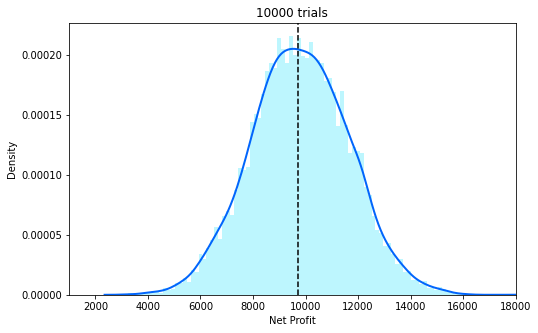

In [5]:
N = 10000
figure(figsize=(8, 5))
ax = distplot(model.exec_simulation(_printResult=False, n=N),
  bins=100,
  kde=True,
  color='xkcd:pale sky blue',
  hist_kws={"linewidth": 15,'alpha':1},
  kde_kws={"color": "xkcd:bright blue", "lw": 2, "label": "KDE"},)
ax.set(xlabel='Net Profit', ylabel='Density')
ax.set_xlim([1000, 18000])
ax.set_title("{} trials".format(N))
ax.axvline(mean(netProfit_data),color="k", linestyle='--')
savefig("monte-carlo-simulation-{}.png".format(N), dpi=1000, bbox_inches="tight")